# Time Series Final Project 

### `1- Importing Libraries`

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

### `2- Retrieving Data`

In [2]:
# Retrieving Data 
light_cars_sales = pd.read_csv("data/LTOTALNSA.csv", index_col='DATE', parse_dates=True) 
light_cars_sales.rename(columns={"LTOTALNSA":"SALES"}, inplace=True)
light_cars_sales

,SALES
DATE,
1976-01-01,864.600
1976-02-01,973.300
1976-03-01,1216.100
1976-04-01,1163.200
1976-05-01,1176.100
...,...
2021-11-01,1014.411
2021-12-01,1203.993
2022-01-01,989.560


### `3-Time Series Visualization`

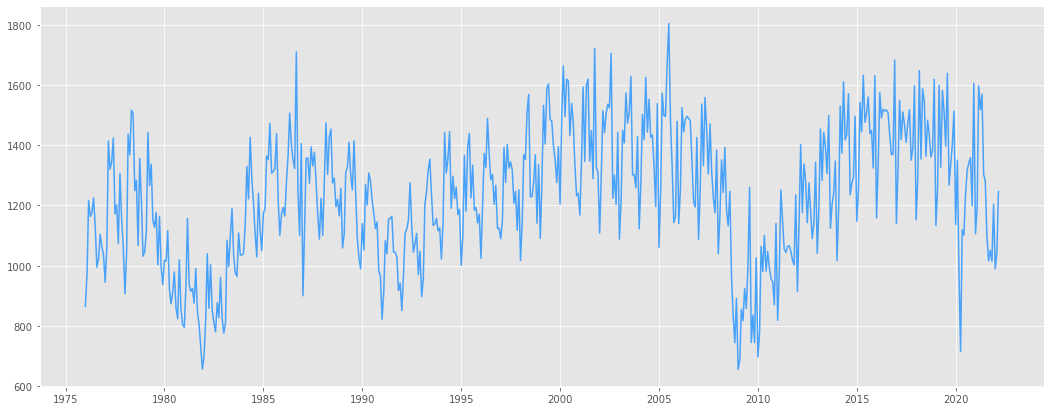

In [3]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales, c='#48A1FA')
plt.show()

### `4-Extracting Time Series Components`

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=light_cars_sales, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### `5-Visualizing Time Series Components`

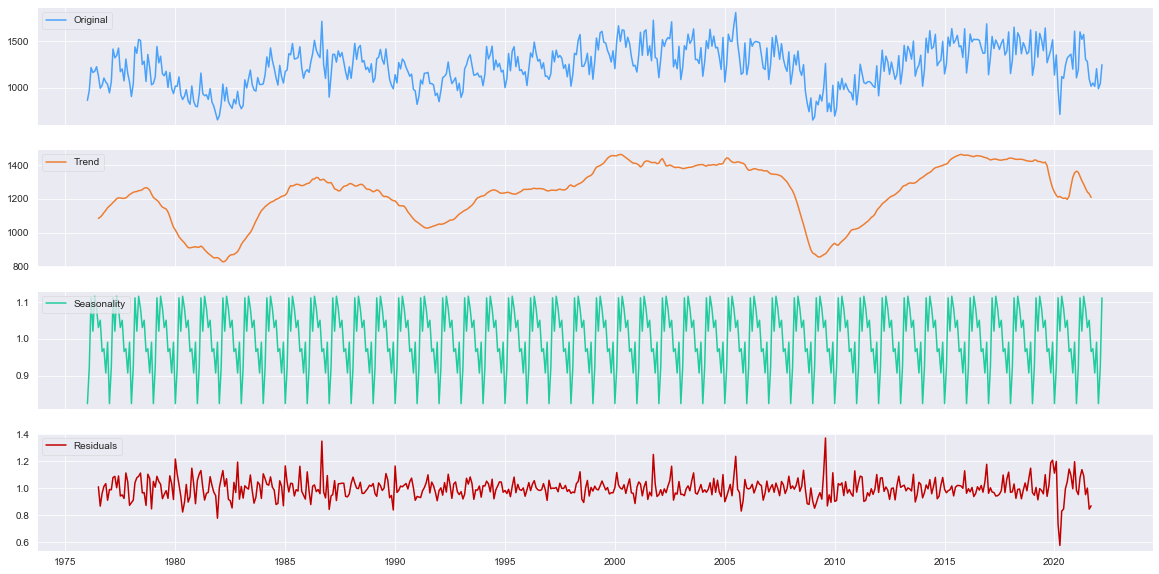

In [5]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(light_cars_sales, label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

### `5-Checking for Stationarity, White Noise, Random walk`

#### `5.1-Finding the mean of time series` 

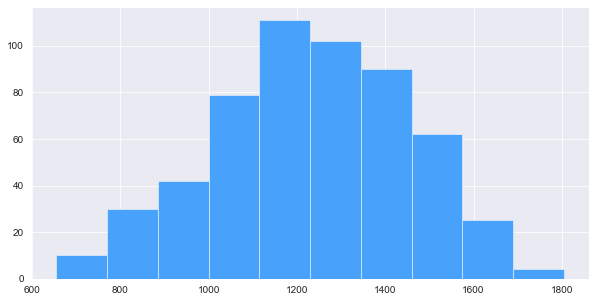

In [6]:
pd.Series(light_cars_sales['SALES']).hist(color='#48A1FA', figsize=(10,5));

In [7]:
# splitting the time series into 15 equaled chunks
ts_chunks = np.split(light_cars_sales['SALES'], 15)

means = np.round(np.mean(ts_chunks, axis=1),2)
stds = np.round(np.std(ts_chunks, axis=1),2)

chunks_df = pd.DataFrame({"chunks": list(range(1, len(ts_chunks)+1)), "mean_vals":means, "variance_vals":stds })
chunks_df

,chunks,mean_vals,variance_vals
0,1,1175.11,167.12
1,2,972.92,172.35
2,3,1050.63,167.83
3,4,1291.27,144.99
4,5,1180.35,146.79
5,6,1128.57,143.98
6,7,1246.83,114.67
7,8,1368.84,165.20
8,9,1401.86,160.68
9,10,1396.98,165.80


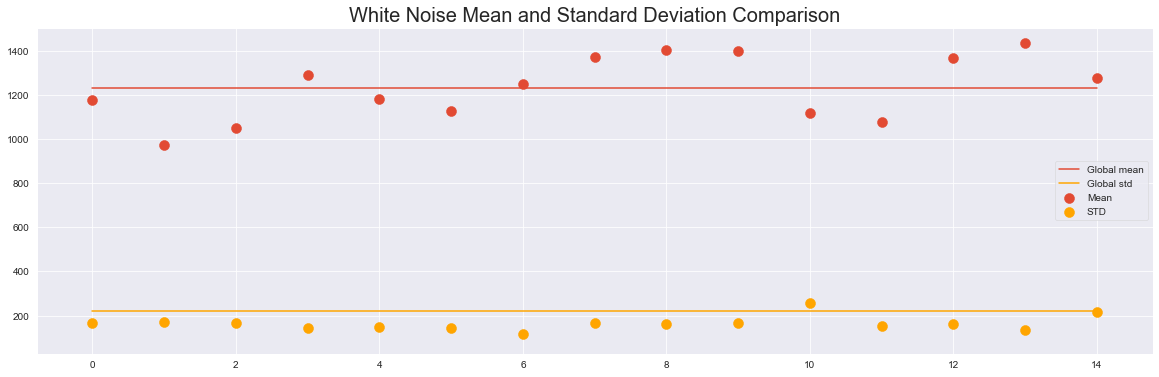

In [8]:
# comparing between means and standard deviations of time series chunks 
mean_time_axis = np.arange(len(means))
std_time_axis = np.arange(len(stds))

# graph preferences 
plt.rcParams["figure.figsize"] = (20,6)
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)

# plotting the actual mean of time series 
plt.plot(mean_time_axis, [light_cars_sales.mean()] * len(means), 
         label='Global mean', lw=1.5)

# plotting the chunked means 
plt.scatter(mean_time_axis, y=means, label='Mean', s=100)

# plotting the actual standard deviation of time series 
plt.plot(std_time_axis, [light_cars_sales.std()] * len(stds),
         label='Global std', lw=1.5, color='orange')

# plotting the chunked standard deviations
plt.scatter(std_time_axis, y=stds, label='STD', color='orange', s=100)

plt.legend();

#### `5.2- Autocorrelation plots`

In [9]:
from statsmodels.graphics.tsaplots import acf, plot_acf

ac_values = np.round(acf(light_cars_sales['SALES'],  fft=False),2)
ac_values

c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([1.  , 0.69, 0.63, 0.6 , 0.47, 0.45, 0.39, 0.42, 0.42, 0.53, 0.52,
       0.55, 0.74, 0.52, 0.5 , 0.46, 0.34, 0.32, 0.26, 0.28, 0.29, 0.37,
       0.36, 0.4 , 0.54, 0.34, 0.31, 0.26, 0.16, 0.13, 0.06, 0.09, 0.09,
       0.18, 0.19, 0.21, 0.35, 0.18, 0.13, 0.09, 0.  ])

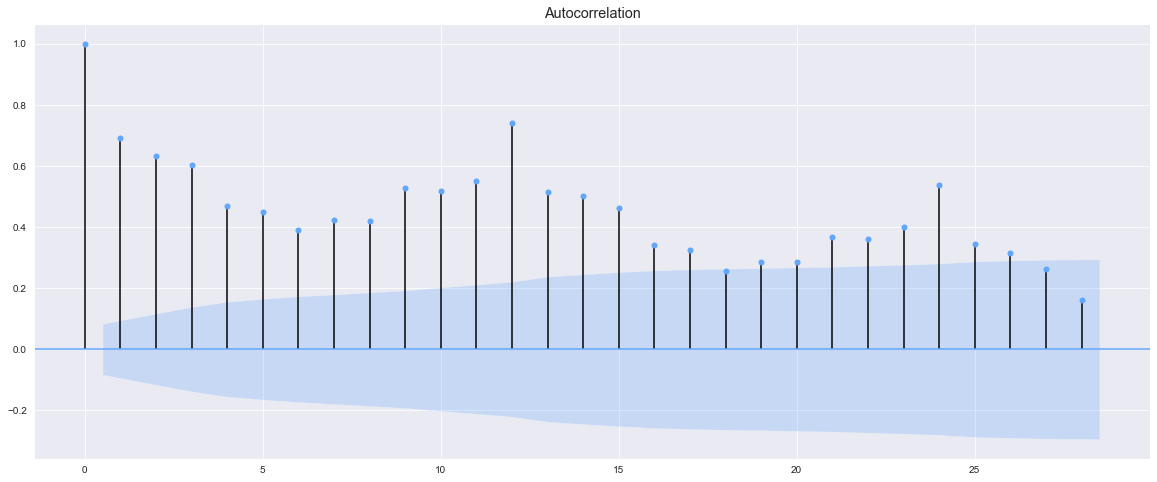

In [10]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(light_cars_sales, ax=ax, 
         color='#60A6FB',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

* `Autocorrelation on first-order difference`

In [11]:
light_cars_sales['SALES_FIRST_DIFF'] = light_cars_sales['SALES'].diff(periods=1)
light_cars_sales = light_cars_sales.dropna()

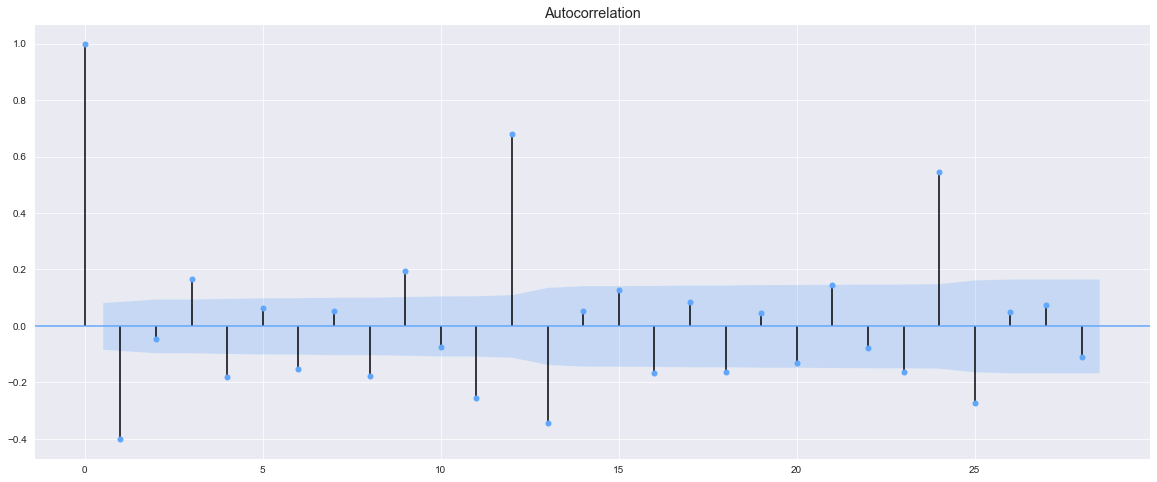

In [12]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(light_cars_sales['SALES_FIRST_DIFF'], ax=ax, 
         color='#60A6FB',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

#### `5.3-Partial Autocorrelation plots`

In [13]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(light_cars_sales['SALES'], nlags=30)
np.round(pacf_values, 2)


array([ 1.  ,  0.69,  0.3 ,  0.19, -0.11,  0.06, -0.01,  0.2 ,  0.08,
        0.35,  0.  ,  0.16,  0.47, -0.4 , -0.04, -0.1 , -0.08, -0.04,
       -0.09,  0.03,  0.01, -0.02,  0.05,  0.03,  0.07, -0.15, -0.19,
       -0.05, -0.02, -0.09, -0.04])

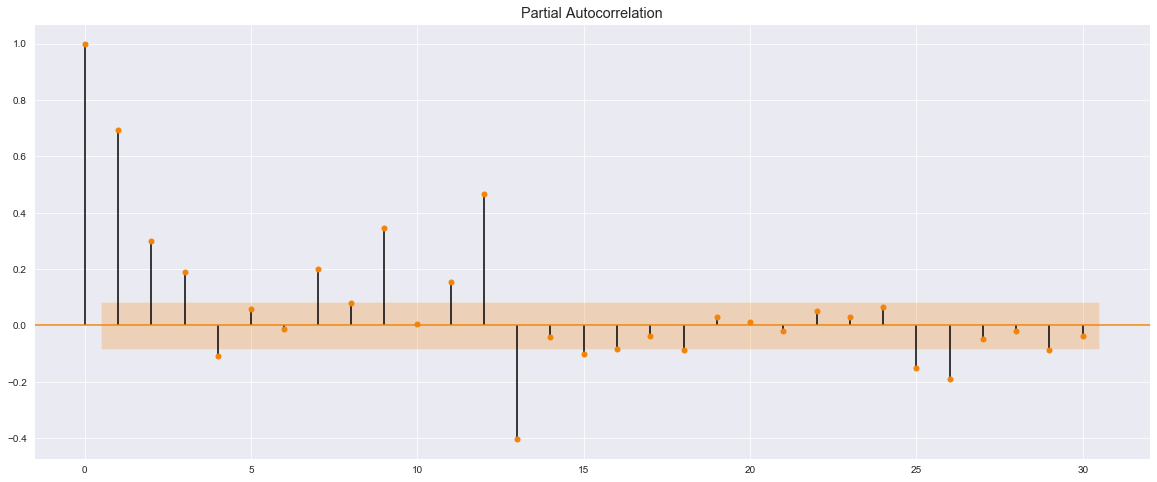

In [14]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(light_cars_sales['SALES'], 
          lags=30, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

* `partial autocorrelation on first-order difference`

In [15]:
pacf_values = pacf(light_cars_sales['SALES_FIRST_DIFF'], nlags=25)
np.round(pacf_values, 2)


array([ 1.  , -0.4 , -0.25,  0.06, -0.11, -0.04, -0.24, -0.11, -0.36,
       -0.01, -0.16, -0.47,  0.41,  0.04,  0.1 ,  0.08,  0.03,  0.07,
       -0.04, -0.03,  0.02, -0.06, -0.04, -0.08,  0.14,  0.17])

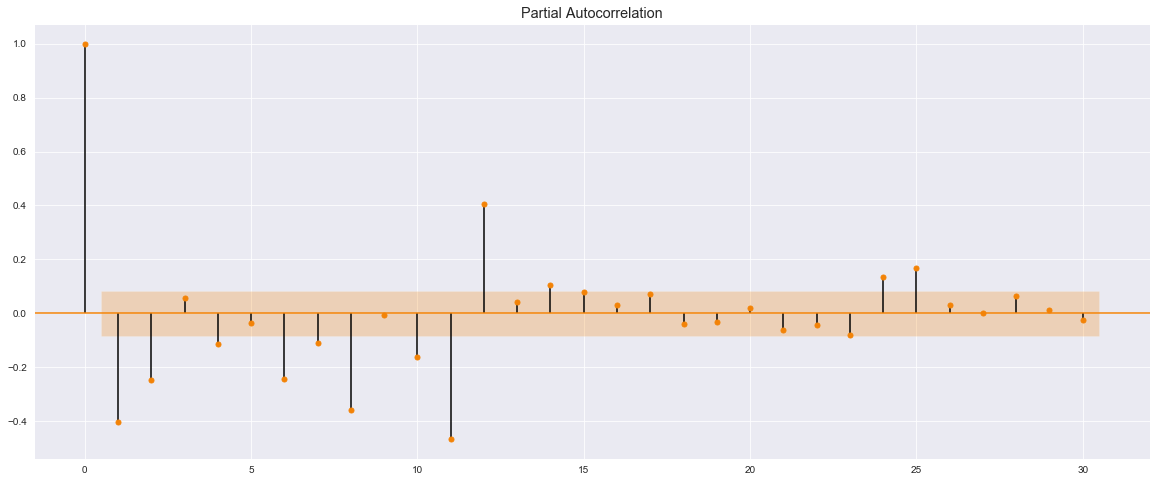

In [16]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(light_cars_sales['SALES_FIRST_DIFF'], 
          lags=30, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

#### `5.4 Augmented Dickey-Fuller Test (Stationarity Test)`


In [17]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(light_cars_sales['SALES'])

A brief discussion about the important outputs from the ADF test is in order. 

In [18]:
print(adf)

-2.829277524541586


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -2.83. That may not mean anything to you just yet but the **pvalue** should.

In [19]:
print(pvalue)

0.05421184907221919


In [20]:
print(nobs)

536


In [21]:
print(critical_values)

{'1%': -3.442609129942274, '5%': -2.866947348175723, '10%': -2.569649926626197}


In [22]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -2.829278
p-value                   0.054212
Lags Used                17.000000
Observations Used       536.000000
Critical Value (1%)      -3.442609
Critical Value (5%)      -2.866947
Critical Value (10%)     -2.569650
dtype: float64


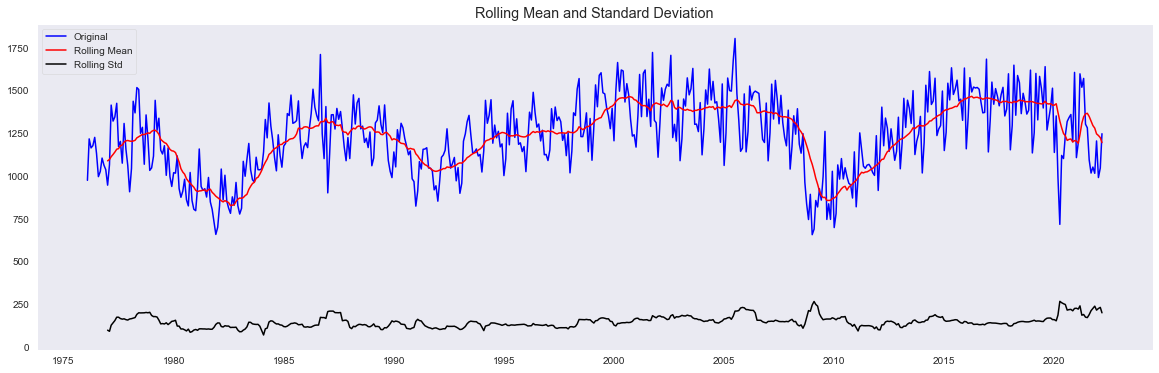

In [23]:
# run DFT on monthly
dftest(light_cars_sales['SALES'])
# p-value allows us to reject a unit root: data is stationary

### `6- Smoothing Time Series`

In [24]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

warnings.filterwarnings("ignore")

In [25]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [26]:
#### MSE Function
### Let's create a Mean Squared Error function that we can use going forward.

def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

#### `6.1 Simple Smoothing`

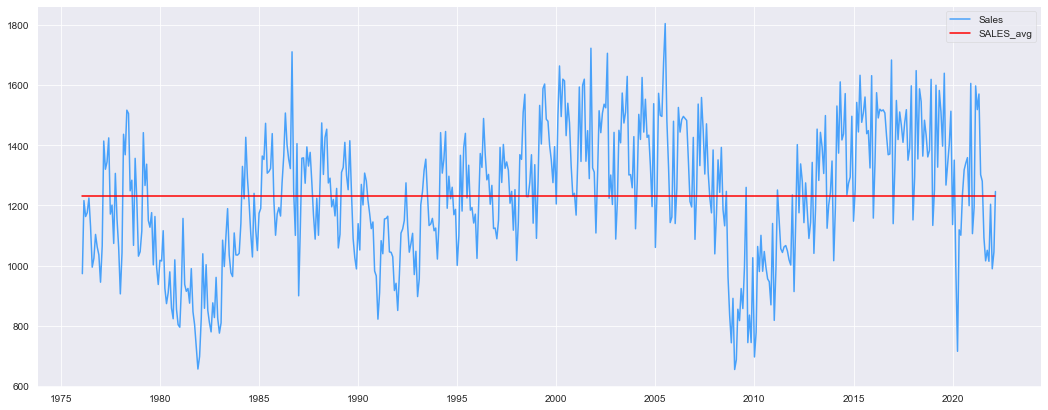

Mean Square Error: 26448273.839244176


In [27]:
# find mean of series
time_series_avg = np.mean(light_cars_sales['SALES'])

# create array of mean value equal to length of time array
light_cars_sales['SALES_avg'] = np.full(shape=len(light_cars_sales), fill_value=time_series_avg, dtype='float')

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_avg'], c='red')
plt.legend(['Sales', 'SALES_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_avg']))}")

light_cars_sales.drop(['SALES_avg'], axis=1, inplace=True)


#### `6.2 moving average Smoothing`

In [28]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

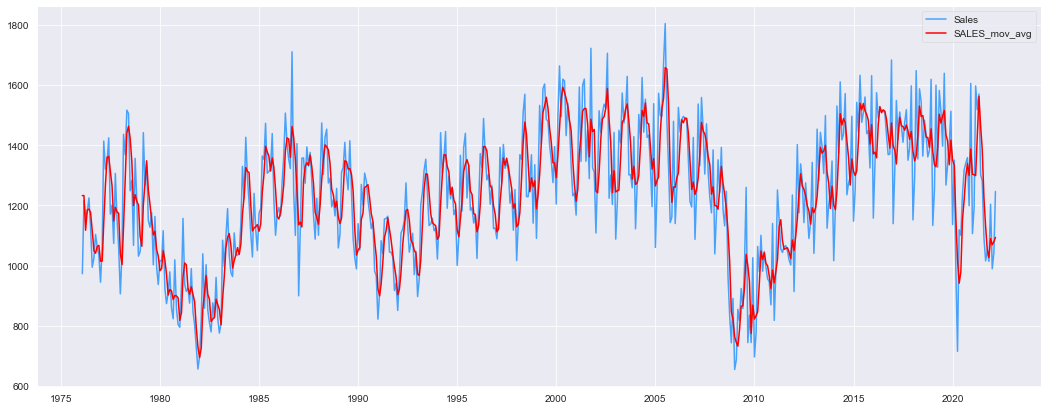

Mean Square Error: 6135947.939583515


In [29]:
mean = np.mean(light_cars_sales['SALES'])
SALES_mov_avg = moving_average(np.array(light_cars_sales['SALES']), window=3, forecast=False)
SALES_mov_avg = np.insert(SALES_mov_avg,[0],[mean,mean])
light_cars_sales['SALES_mov_avg']  = SALES_mov_avg

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_mov_avg'], c='red')

plt.legend(['Sales', 'SALES_mov_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_mov_avg']))}")

light_cars_sales.drop(['SALES_mov_avg'], axis=1, inplace=True)

#### `6.3 Exponential Smoothing`

In [30]:
def ewma(observations, forecast=True):
    '''returns the exponentially weighted smoothed version of an array of observations.'''
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, mean)
    else:
        return output

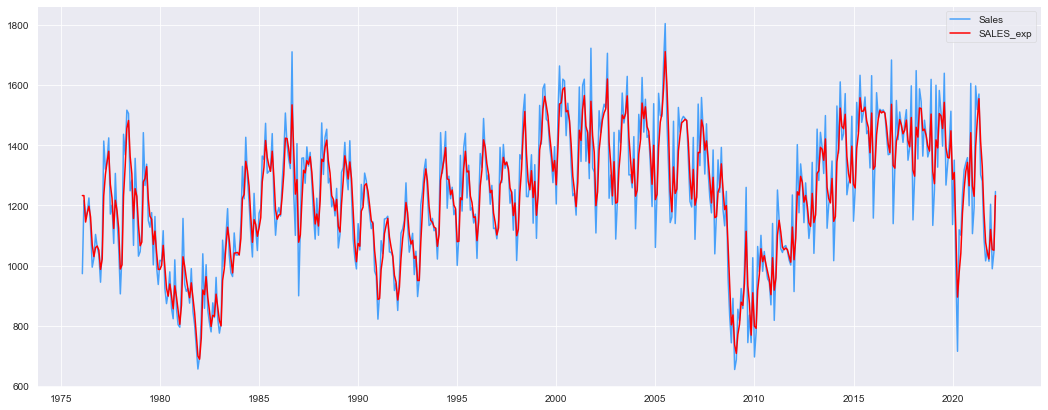

Mean Square Error: 2880605.0350474003


In [31]:
mean = np.mean(light_cars_sales['SALES'])
ewma_smoothed_vals = ewma(light_cars_sales['SALES'], forecast=False)
np.place(ewma_smoothed_vals, ewma_smoothed_vals==0, mean)
light_cars_sales['SALES_exp'] = ewma_smoothed_vals

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_exp'], c='red')

plt.legend(['Sales', 'SALES_exp'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_exp']))}")

light_cars_sales.drop(['SALES_exp'], axis=1, inplace=True)

#### `6.4 Forecasting by smoothing techniques`

In [32]:
# Splitting the data 
train = np.array(light_cars_sales['SALES'][:-50])
test = np.array(light_cars_sales['SALES'][-50:])

train_time = np.array(light_cars_sales.index[:-50])
test_time = np.array(light_cars_sales.index[-50:])

`A. simple average`

In [33]:
from IPython.display import display

# find mean of series
trend_seasonal_avg = np.mean(light_cars_sales['SALES'])

# create array of mean value equal to length of time array
simple_avg_preds = np.round(np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float'),3)

# mse
simple_mse = mse(test, simple_avg_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : simple_avg_preds}).head(10))
# results
print("MSE: ", simple_mse)

,Actual,Predictions
0,1294.694,1232.798
1,1647.975,1232.798
2,1354.484,1232.798
3,1587.518,1232.798
4,1544.695,1232.798
5,1363.887,1232.798
6,1483.169,1232.798
7,1432.993,1232.798
8,1361.288,1232.798
9,1383.388,1232.798


MSE:  2537583.188796001


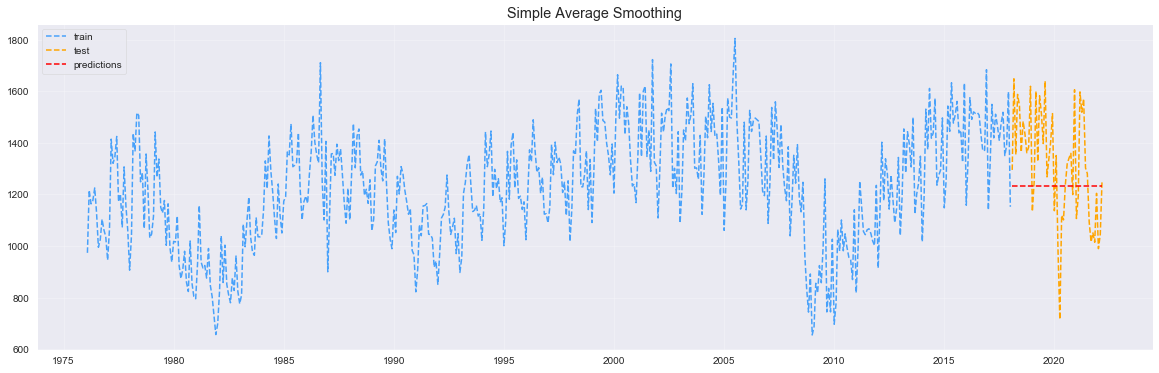

In [35]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3);

`B. Single Exponential`

In [36]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = np.round(single.forecast(len(test)), 3)
single_mse = mse(test, single_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : single_preds}).head(10))

print("MSE: ", single_mse)

,Actual,Predictions
0,1294.694,1340.986
1,1647.975,1340.986
2,1354.484,1340.986
3,1587.518,1340.986
4,1544.695,1340.986
5,1363.887,1340.986
6,1483.169,1340.986
7,1432.993,1340.986
8,1361.288,1340.986
9,1383.388,1340.986


MSE:  2236923.11102


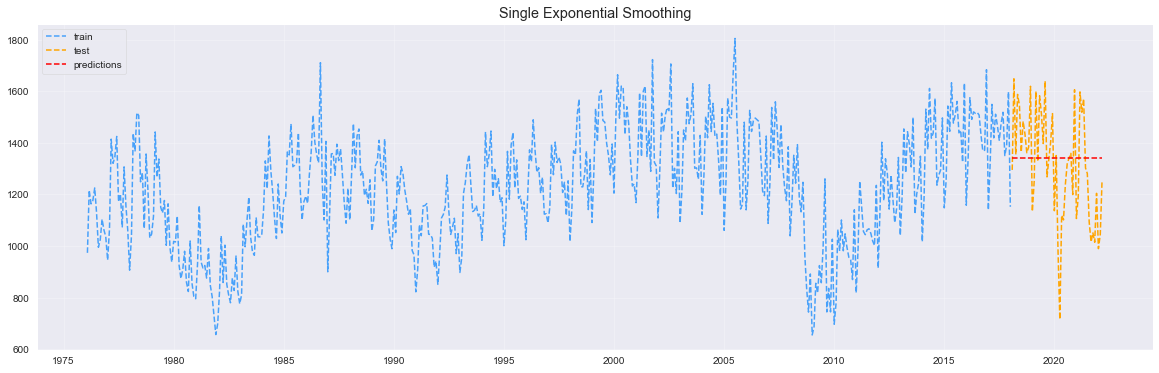

In [37]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

`C. Double Exponential`

In [38]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : double_preds}).head(10))

print("MSE: ", double_mse)

,Actual,Predictions
0,1294.694,1305.17160
1,1647.975,1294.95387
2,1354.484,1284.73614
3,1587.518,1274.51841
4,1544.695,1264.30068
5,1363.887,1254.08295
6,1483.169,1243.86522
7,1432.993,1233.64749
8,1361.288,1223.42976
9,1383.388,1213.21203


MSE:  5197783.503529127


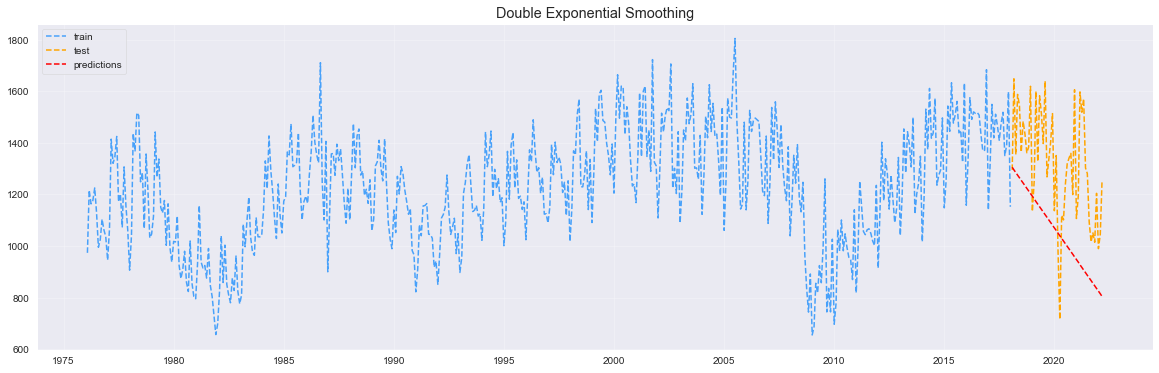

In [39]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

`D. Triple Exponential`

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend=None,
                              seasonal=None,
                              seasonal_periods=12).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : triple_preds}).head(10))

print("MSE: ", triple_mse)

,Actual,Predictions
0,1294.694,1340.986344
1,1647.975,1340.986344
2,1354.484,1340.986344
3,1587.518,1340.986344
4,1544.695,1340.986344
5,1363.887,1340.986344
6,1483.169,1340.986344
7,1432.993,1340.986344
8,1361.288,1340.986344
9,1383.388,1340.986344


MSE:  2236924.01555066


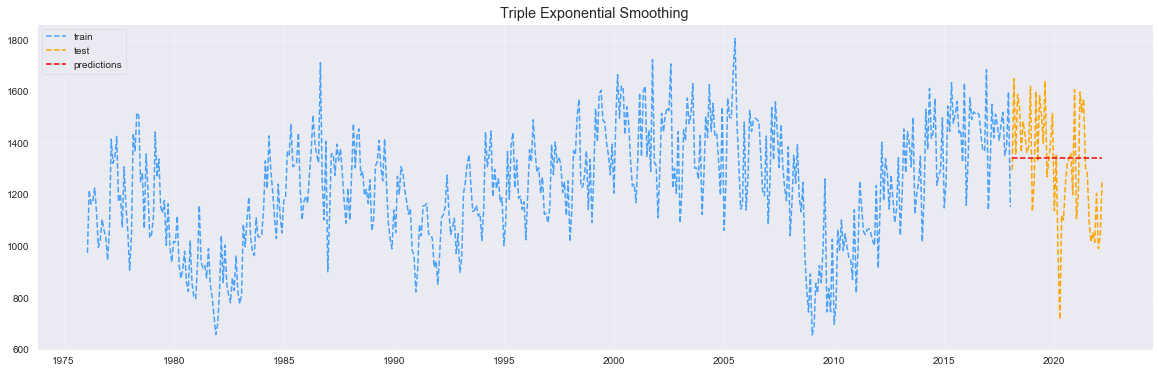

In [41]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

In [42]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
display(df)

,MSE
simple,2.537583e+06
single,2.236923e+06
double,5.197784e+06
triple,2.236924e+06


#### `6.5 Forecasting by SARIMA model`

##### `6.5.1 ACF & PACF`

In [43]:
import statsmodels.api as sm

# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data, c='#48A1FA')
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False, c='#48A1FA')
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False, c='#48A1FA')
    sns.despine()
    plt.tight_layout()

In [44]:
light_cars_sales.columns

Index(['SALES', 'SALES_FIRST_DIFF'], dtype='object')

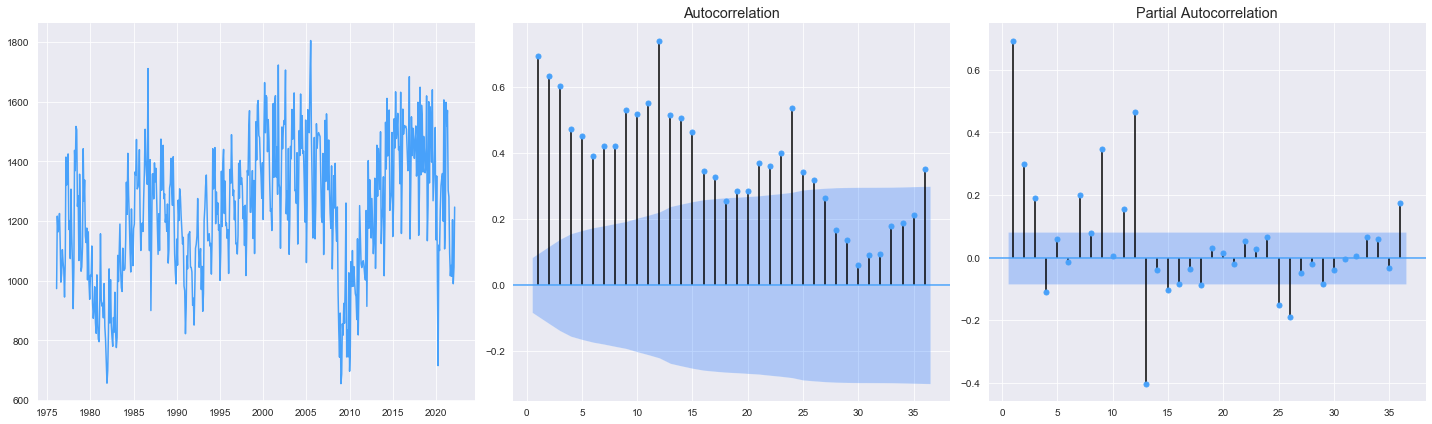

In [45]:
# helper plot for monthly temps
plots(light_cars_sales.SALES, lags=36);
# open Duke guide for visual
# we note a 12-period cycle (yearly) with suspension bridge design, so must use SARIMA

#### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

##### `6.5.2 Build SARIMA model`

In [46]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(light_cars_sales.SALES, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                SALES   No. Observations:                  554
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -3315.346
Date:                              Sat, 02 Jul 2022   AIC                           6638.692
Time:                                      19:09:09   BIC                           6655.873
Sample:                                  02-01-1976   HQIC                          6645.410
                                       - 03-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1267      1.096      1.028      0.304      -1.021       3.275
ar.L1          0.7939      0.021     37.022      0.000       0.752       0.836
ma.S.L12      -0.7919      0.026    -30.226      0.000      -0.843      -0.741
sigma2      1.174e+04    447.910     26.214      0.000    1.09e+04    1.26e+04
===================================================================================
Ljung-Box (L1) (Q):                  28.75   Jarque-Bera (JB):               290.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.46
Prob(H) (two-sided):                  0.90   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

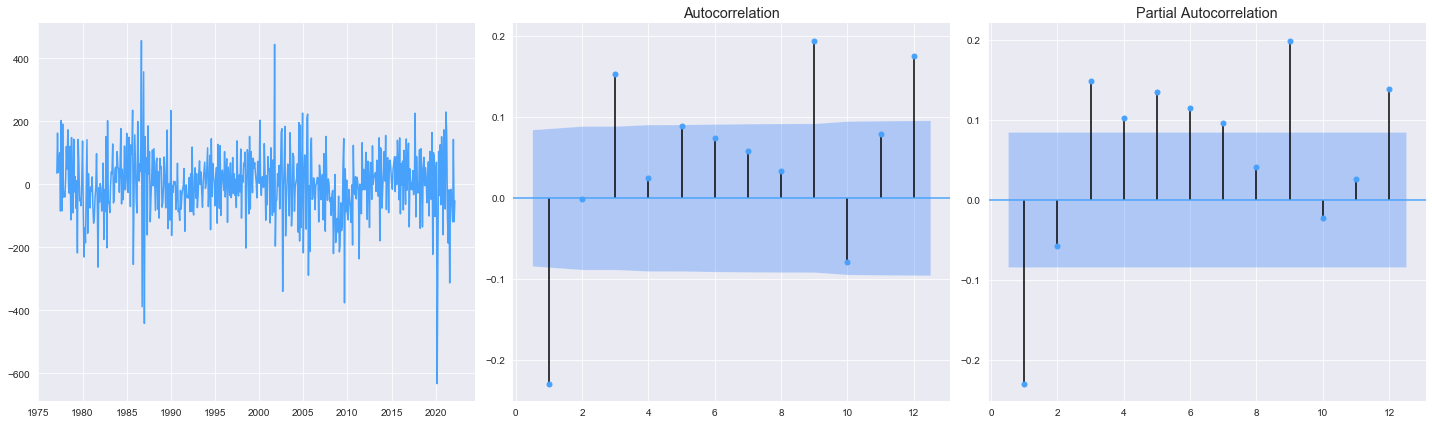

In [47]:
# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

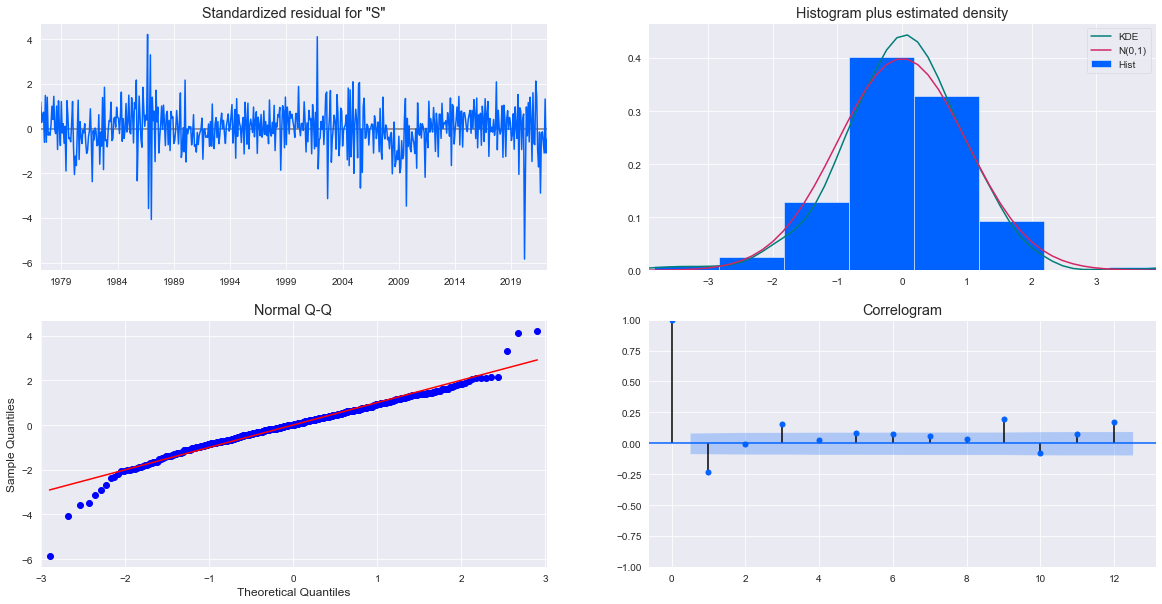

In [48]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

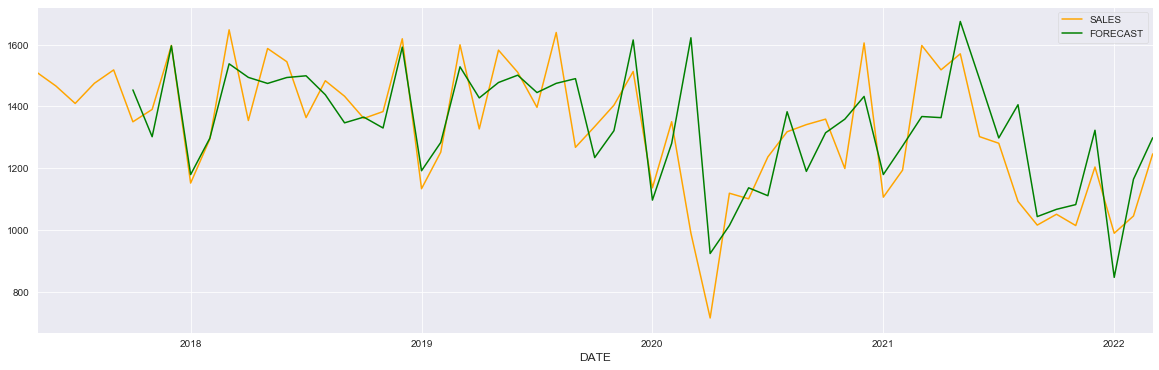

In [49]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
light_cars_sales['FORECAST'] = sar.predict(start = 500, end= light_cars_sales.shape[0])  
light_cars_sales[495:][['SALES', 'FORECAST']].plot(color = ('orange','g'));

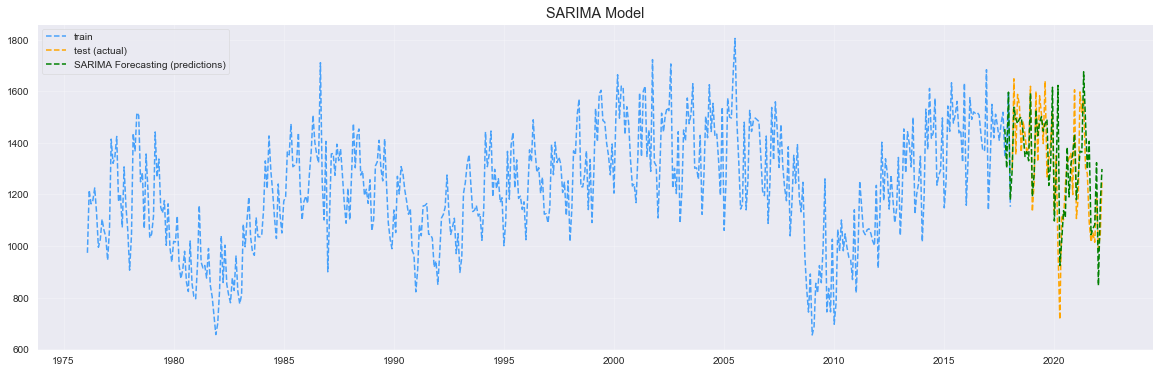

In [50]:
plt.plot(light_cars_sales['SALES'][:-50], '#48A1FA', linestyle="--", label="train")
plt.plot(light_cars_sales['SALES'][-50:], color='orange', linestyle="--", label="test (actual)")
plt.plot(light_cars_sales['FORECAST'], 'g--', label="SARIMA Forecasting (predictions)")
plt.legend(loc='upper left')
plt.title("SARIMA Model")
plt.grid(alpha=0.3);

In [51]:
import numpy as np
actual = np.asarray(light_cars_sales.SALES[-54:])
SARIMA_prediction = np.asarray(light_cars_sales.FORECAST.dropna())
SARIMA_mse = mse(actual, SARIMA_prediction)
print("MSE: ", SARIMA_mse)

MSE:  1085655.1496082593


##### `6.5.3 Statistical tests of SARIMA model`

In [52]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]


# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=290.927, p=0.000
Ljung-Box: val=201.963, p=0.000
Heteroskedasticity: val=1.019, p=0.898
Durbin-Watson: d=2.46


##### `6.5.4 SARIMA model and parameters tuning`

In [ ]:
import pmdarima as pm

#from pyramid.arima import auto_arima
stepwise_model = pm.auto_arima(light_cars_sales.SALES, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

##### `6.5.5 SARIMA model with best parameters`

In [ ]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar_2 = sm.tsa.statespace.SARIMAX(light_cars_sales.SALES, 
                                order=(2,0,2), 
                                seasonal_order=(2,1,1,12), 
                                trend='c').fit()
sar_2.summary()

In [ ]:
# plot residual diagnostics
sar_2.plot_diagnostics(lags=12,figsize = (20,10),);

In [ ]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
light_cars_sales['FORECAST'] = sar_2.predict(start = 500, end= light_cars_sales.shape[0])  
light_cars_sales[495:][['SALES', 'FORECAST']].plot(color = ('orange','g'));

In [ ]:
plt.plot(light_cars_sales['SALES'][:-50], '#48A1FA', linestyle="--", label="train")
plt.plot(light_cars_sales['SALES'][-50:], color='orange', linestyle="--", label="test (actual)")
plt.plot(light_cars_sales['FORECAST'], 'g--', label="SARIMA Forecasting (predictions)")
plt.legend(loc='upper left')
plt.title("SARIMA Model")
plt.grid(alpha=0.3);

In [ ]:
actual = np.asarray(light_cars_sales.SALES[-54:])
SARIMA_prediction = np.asarray(light_cars_sales.FORECAST.dropna())
SARIMA_mse = mse(actual, SARIMA_prediction)
print("MSE: ", SARIMA_mse)

In [ ]:
from dateutil.relativedelta import relativedelta
def future_preds_df(model,series,num_months):
    pred_first = series.index.max()+relativedelta(months=1)
    pred_last = series.index.max()+relativedelta(months=num_months)
    date_range_index = pd.date_range(pred_first,pred_last,freq = 'MS')
    vals = model.predict(n_periods = num_months)
    return pd.DataFrame(vals,index = date_range_index)

In [ ]:
preds = future_preds_df(stepwise_model,light_cars_sales.SALES,100)

In [ ]:
# Future Forcasting
plt.plot(light_cars_sales.SALES)
plt.plot(preds, color = 'g')

#### `6.6 Forecasting by Facebook Prophet model`

In [ ]:
# Retrieving Data
light_cars_sales = pd.read_csv("LTOTALNSA.csv", parse_dates=True) 
light_cars_sales.rename(columns={"DATE": "ds", "LTOTALNSA":"y"}, inplace=True)
light_cars_sales

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(light_cars_sales)

In [ ]:
future = m.make_future_dataframe(periods= 365)
print(future.head())
print(future.tail())

In [ ]:
# populate forecast
forecast = m.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# plot forecast
m.plot(forecast);

In [ ]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
m.plot_components(forecast);

#### `6.7 Forecasting by Deep Learning models`

##### `6.7.1 Time Series Prediction by Neural Networks`

In [53]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
# from colorsetup import colors, palette
# plt.style.use('fivethirtyeight')
# sns.set_palette(palette)
import pandas as pd
from datetime import datetime
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [54]:
# Retrieving Data 
light_cars_sales = pd.read_csv("LTOTALNSA.csv", index_col='DATE', parse_dates=True) 
light_cars_sales.rename(columns={"LTOTALNSA":"SALES"}, inplace=True)
light_cars_sales

,SALES
DATE,
1976-01-01,864.600
1976-02-01,973.300
1976-03-01,1216.100
1976-04-01,1163.200
1976-05-01,1176.100
...,...
2021-11-01,1014.411
2021-12-01,1203.993
2022-01-01,989.560


In [55]:
# split into train and test sets
train_size = int(len(light_cars_sales) * 0.70)
test_size = len(light_cars_sales) - train_size
train, test = light_cars_sales[0:train_size][:].values, light_cars_sales[train_size:len(light_cars_sales)][:].values
print(len(train), len(test))

388 167


In [56]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [58]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
193/193 - 0s - loss: 1249582.7500
Epoch 2/200
193/193 - 0s - loss: 114512.0625
Epoch 3/200
193/193 - 0s - loss: 25087.6973
Epoch 4/200
193/193 - 0s - loss: 24226.3359
Epoch 5/200
193/193 - 0s - loss: 24003.3652
Epoch 6/200
193/193 - 0s - loss: 24444.3984
Epoch 7/200
193/193 - 0s - loss: 24324.8008
Epoch 8/200
193/193 - 0s - loss: 24270.7520
Epoch 9/200
193/193 - 0s - loss: 24362.5938
Epoch 10/200
193/193 - 0s - loss: 24400.5723
Epoch 11/200
193/193 - 0s - loss: 24362.8320
Epoch 12/200
193/193 - 0s - loss: 24220.9824
Epoch 13/200
193/193 - 0s - loss: 24362.5898
Epoch 14/200
193/193 - 0s - loss: 24511.7363
Epoch 15/200
193/193 - 0s - loss: 24628.4375
Epoch 16/200
193/193 - 0s - loss: 24637.0176
Epoch 17/200
193/193 - 0s - loss: 24006.9121
Epoch 18/200
193/193 - 0s - loss: 24481.1934
Epoch 19/200
193/193 - 0s - loss: 24460.9219
Epoch 20/200
193/193 - 0s - loss: 24774.3984
Epoch 21/200
193/193 - 0s - loss: 24682.0703
Epoch 22/200
193/193 - 0s - loss: 24411.1602
Epoch 23/200
193

In [59]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 24139.90 MSE (155.37 RMSE)
Test Score: 41173.30 MSE (202.91 RMSE)


In [60]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(light_cars_sales)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(light_cars_sales)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(light_cars_sales)-1, :] = testPredict

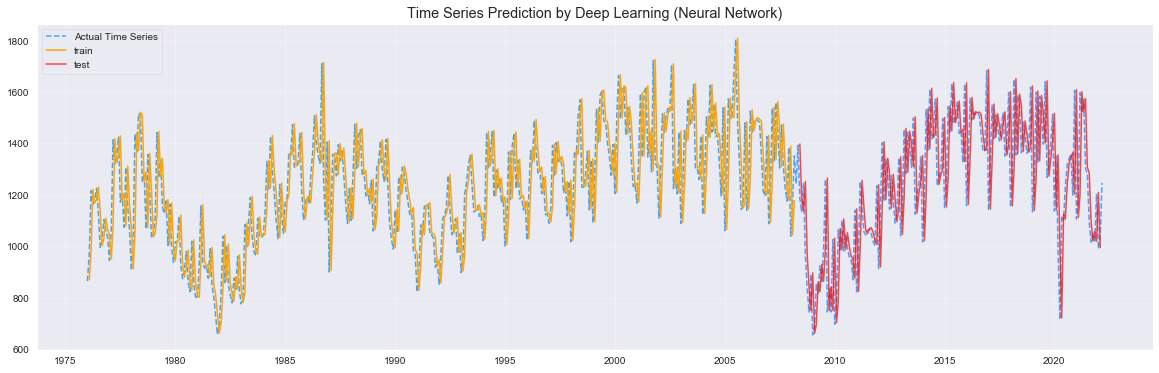

In [61]:
# Time series prediction by Deep Learning (Neural Network)
plt.plot(light_cars_sales, '#48A1FA', linestyle="--", label="Actual Time Series")
plt.plot(light_cars_sales.index, trainPredictPlot , 'orange', linestyle="-", label="train")
plt.plot(light_cars_sales.index, testPredictPlot, color='red', linestyle="-", label="test",alpha=0.7)
plt.legend(loc='upper left')
plt.title("Time Series Prediction by Deep Learning (Neural Network)")
plt.grid(alpha=0.3)
plt.show()

##### `6.7.2 Time Series Prediction by RNN/LSTM`


In [78]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=look_back))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

### `Coming Soon`